In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from matplotlib import pyplot

Importing plotly failed. Interactive plots will not work.


In [6]:
df = pd.read_csv("data/data20_q1/de_confirmed_cases.csv")
df

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
845,2022-05-16,25818405
846,2022-05-17,25890456
847,2022-05-18,25949175
848,2022-05-19,25998085


In [7]:
df2021 = df.iloc[df.index[38:100]]
df2021

,ds,y
38,2020-02-29,66
39,2020-03-01,117
40,2020-03-02,150
41,2020-03-03,188
42,2020-03-04,240
...,...,...
95,2020-04-26,154175
96,2020-04-27,155193
97,2020-04-28,156337
98,2020-04-29,157641


In [8]:
df2021.reset_index(inplace=True)

In [9]:
df2021.drop(columns=["index"], inplace=True)
df2021.head()

/tmp/ipykernel_27901/3683110294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2021.drop(columns=["index"], inplace=True)


,ds,y
0,2020-02-29,66
1,2020-03-01,117
2,2020-03-02,150
3,2020-03-03,188
4,2020-03-04,240


In [10]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -60.631
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2792.76     0.0642803       1568.66           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3064.71    0.00184785       1335.24      0.4425           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299          3151     0.0143416       1723.28           1           1      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3347.46       0.26004       22174.4           1           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3595.02     0.0104084       830.096      0.1531           1      580   
    Iter      log prob        ||dx||      ||grad||       alpha   

In [15]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
875,2022-06-15
876,2022-06-16
877,2022-06-17
878,2022-06-18
879,2022-06-19


In [16]:
forecast = m.predict(future)

/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [17]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
875,2022-06-15,2.728007e+07,2.691580e+07,2.764030e+07
876,2022-06-16,2.733859e+07,2.695644e+07,2.771901e+07
877,2022-06-17,2.738902e+07,2.697169e+07,2.779114e+07
878,2022-06-18,2.743498e+07,2.698700e+07,2.788300e+07
879,2022-06-19,2.746948e+07,2.700421e+07,2.796582e+07


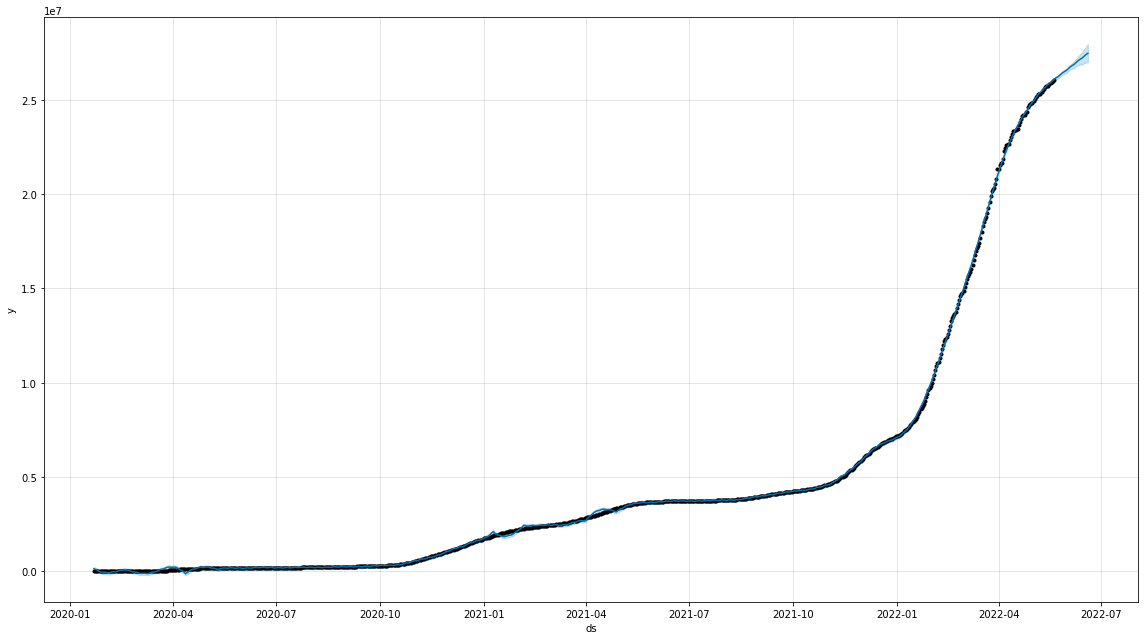

In [18]:
fig1 = m.plot(forecast, figsize=(16, 9))

/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/vladimir/GoogleDrive/Courses/03Third_semester/projects/dsa-project/venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


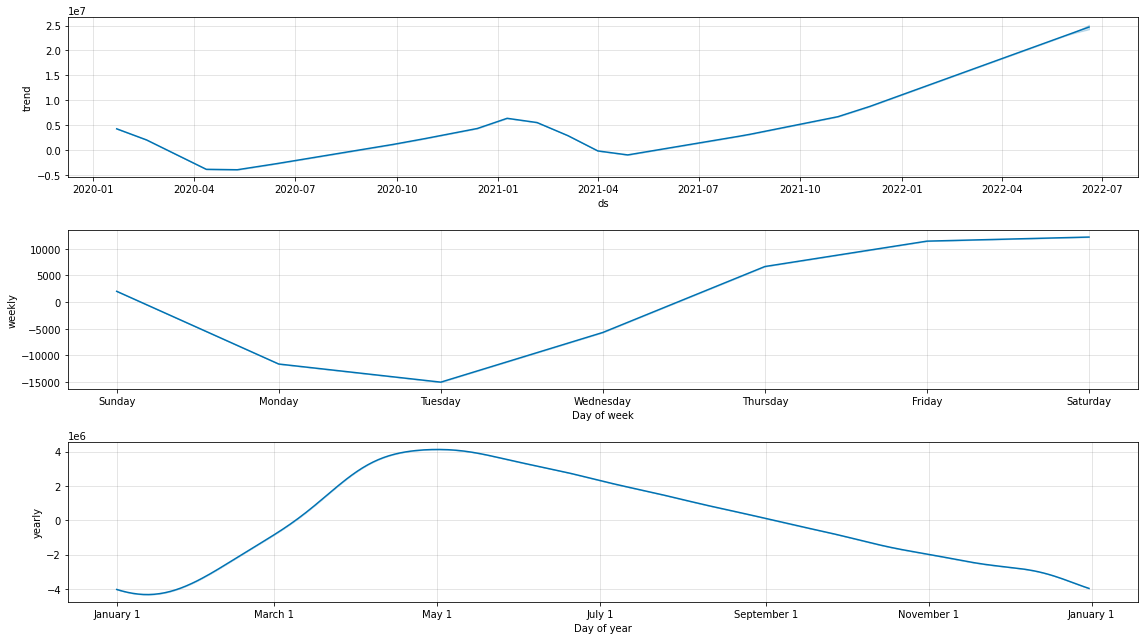

In [19]:
fig2 = m.plot_components(forecast, figsize=(16, 9))

In [45]:
nl_cases_forecast = plot_plotly(m, forecast)
nl_cases_forecast.write_html("/home/vladimir/GoogleDrive/Courses/03Third_semester/data_structures_algorithms/project/data/nl_cases_forecast.html")

In [46]:
nl_cases_forecast_comp = plot_components_plotly(m, forecast)
nl_cases_forecast_comp.write_html("/home/vladimir/GoogleDrive/Courses/03Third_semester/data_structures_algorithms/project/data/nl_cases_forecast_comp.html")

,ds,y
388,2022-01-24,3954299
389,2022-01-25,4008459
390,2022-01-26,4067075
391,2022-01-27,4131630
392,2022-01-28,4205649


In [71]:
train = df2021[:300]
test = df2021[300:]

In [72]:
m2 = Prophet()
m2.fit(train)
nl_future = m2.make_future_dataframe(periods=90, freq='D')
nl_forecast = m2.predict(nl_future)
nl_forecast.head()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.41758
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1379.24     0.0053408       4948.88      0.4427           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1462.62     0.0013882       5475.65      0.5789      0.5789      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1508.73   0.000904521       510.164           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1547.39    0.00405151       1936.25      0.4808           1      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1591.02   0.000953984       2715.85           1           1      571   
    Iter      log prob        ||dx||      ||grad||       alpha  

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,807595.975527,802775.040419,812554.571485,807595.975527,807595.975527,104.198108,104.198108,104.198108,104.198108,104.198108,104.198108,0.0,0.0,0.0,807700.173635
1,2021-01-02,814612.970668,810162.457383,819809.000619,814612.970668,814612.970668,450.838123,450.838123,450.838123,450.838123,450.838123,450.838123,0.0,0.0,0.0,815063.808791
2,2021-01-03,821629.965809,817103.222912,826727.340119,821629.965809,821629.965809,519.131303,519.131303,519.131303,519.131303,519.131303,519.131303,0.0,0.0,0.0,822149.097112
3,2021-01-04,828646.960950,824319.784230,833754.142925,828646.960950,828646.960950,56.999825,56.999825,56.999825,56.999825,56.999825,56.999825,0.0,0.0,0.0,828703.960775
4,2021-01-05,835663.956091,830314.235960,840098.821035,835663.956091,835663.956091,-442.980918,-442.980918,-442.980918,-442.980918,-442.980918,-442.980918,0.0,0.0,0.0,835220.975173


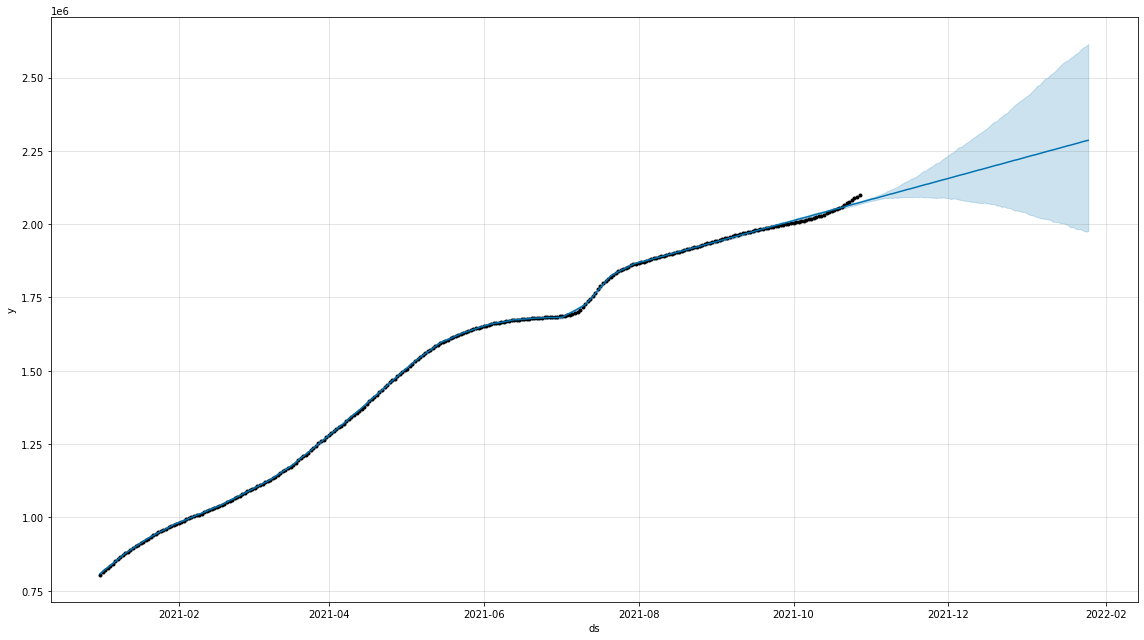

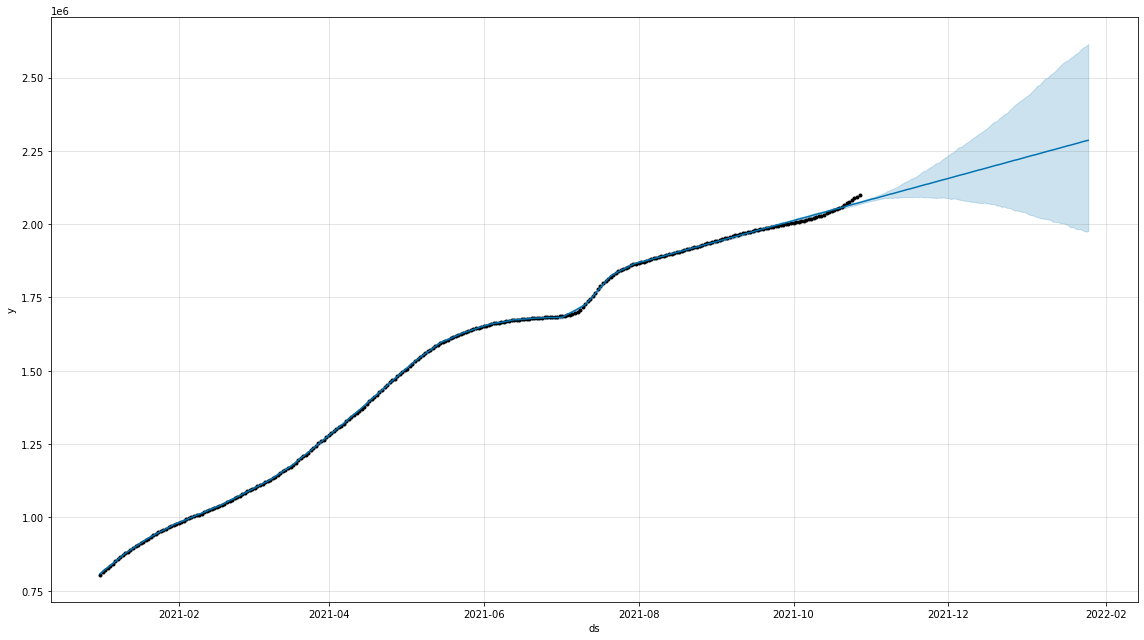

In [73]:
m2.plot(nl_forecast, figsize=(16, 9))


In [102]:
nl_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          390 non-null    datetime64[ns]
 1   trend                       390 non-null    float64       
 2   yhat_lower                  390 non-null    float64       
 3   yhat_upper                  390 non-null    float64       
 4   trend_lower                 390 non-null    float64       
 5   trend_upper                 390 non-null    float64       
 6   additive_terms              390 non-null    float64       
 7   additive_terms_lower        390 non-null    float64       
 8   additive_terms_upper        390 non-null    float64       
 9   weekly                      390 non-null    float64       
 10  weekly_lower                390 non-null    float64       
 11  weekly_upper                390 non-null    float64       

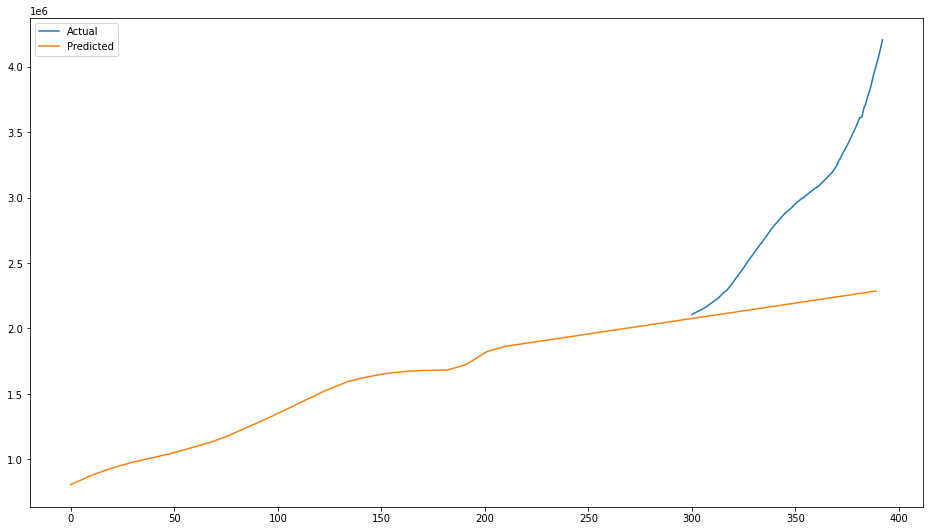

In [99]:
y_test = test['y']
y_pred = nl_forecast['yhat'].values
pyplot.figure(figsize=(16, 9))
pyplot.plot(y_test, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [103]:
df

,ds,y
0,2020-02-27,1
1,2020-02-28,1
2,2020-02-29,6
3,2020-03-01,10
4,2020-03-02,18
...,...,...
697,2022-01-24,3954299
698,2022-01-25,4008459
699,2022-01-26,4067075
700,2022-01-27,4131630


In [116]:
train2 = df[:600]
test2 = df[600:]
m3 = Prophet()
m3.fit(train2)
nl_future2 = m3.make_future_dataframe(periods=100, freq='D')
nl_forecast2 = m3.predict(nl_future2)
nl_forecast2.head()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -8.47519
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2341.63    0.00175574       1189.48      0.2491      0.2491      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2439.82     0.0125399       2181.97      0.2435      0.8975      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2493.37     0.0121784       930.178           1           1      366   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2526.28    0.00280229       1789.83      0.3808           1      482   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2545.02    0.00613741       787.226           1           1      598   
    Iter      log prob        ||dx||      ||grad||       alpha  

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-27,-6941.620057,-23554.643680,9889.881948,-6941.620057,-6941.620057,-41.526420,-41.526420,-41.526420,-41.526420,-41.526420,-41.526420,0.0,0.0,0.0,-6983.146477
1,2020-02-28,-6249.772093,-23852.519786,10705.811165,-6249.772093,-6249.772093,240.080341,240.080341,240.080341,240.080341,240.080341,240.080341,0.0,0.0,0.0,-6009.691753
2,2020-02-29,-5557.924129,-22178.035986,12358.517542,-5557.924129,-5557.924129,334.486054,334.486054,334.486054,334.486054,334.486054,334.486054,0.0,0.0,0.0,-5223.438075
3,2020-03-01,-4866.076166,-21580.906173,12490.001350,-4866.076166,-4866.076166,253.853617,253.853617,253.853617,253.853617,253.853617,253.853617,0.0,0.0,0.0,-4612.222548
4,2020-03-02,-4174.228202,-21701.584744,13303.444649,-4174.228202,-4174.228202,-136.118033,-136.118033,-136.118033,-136.118033,-136.118033,-136.118033,0.0,0.0,0.0,-4310.346234


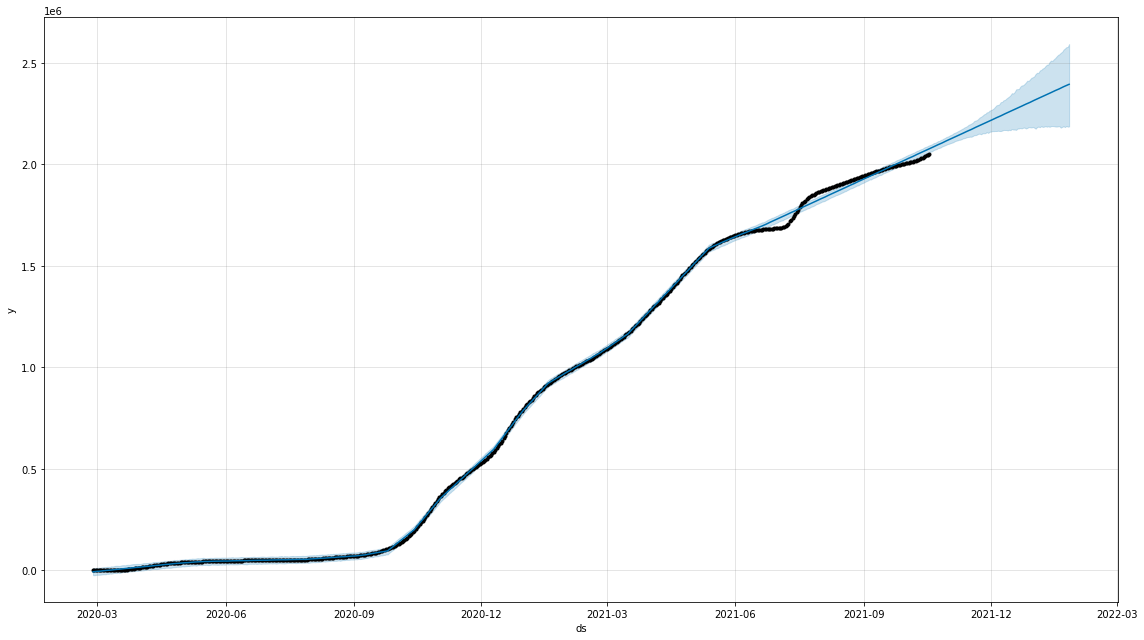

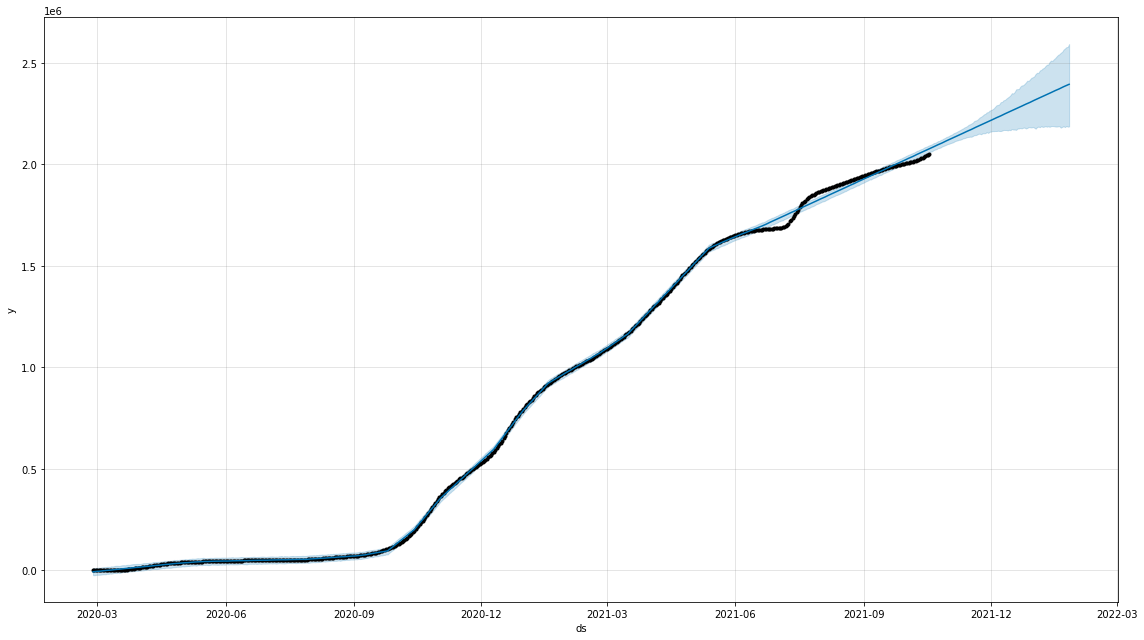

In [117]:
m3.plot(nl_forecast2, figsize=(16, 9))

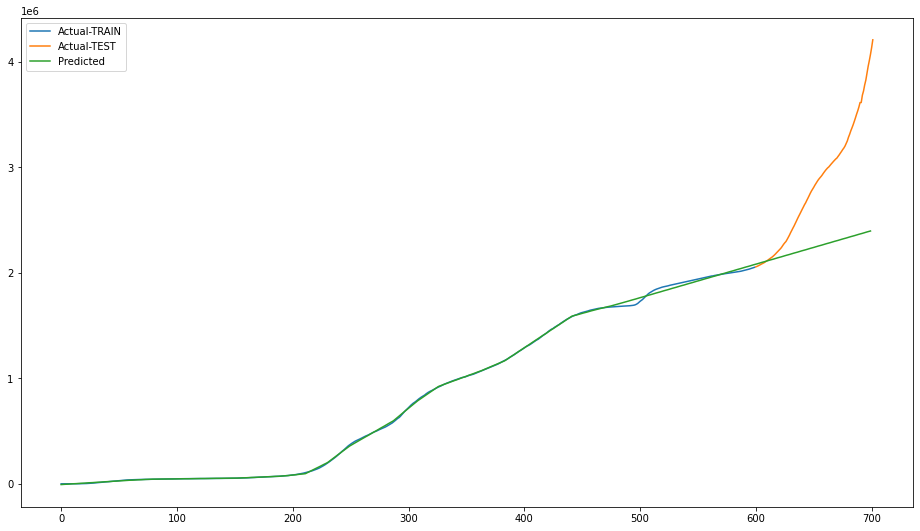

In [118]:
y_train = train2['y']
y_test = test2['y']
y_pred = nl_forecast2['yhat'].values
pyplot.figure(figsize=(16, 9))
pyplot.plot(y_train, label='Actual-TRAIN')
pyplot.plot(y_test, label='Actual-TEST')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()